# Module 1: Data Science Fundamentals
## Sprint 3: Intro to Modeling
## Subproject 2: Correlation Analysis, Linear Regression

Welcome to the 2nd subproject of Sprint 3. In this subproject, for the first time we will actually use data to make predictions!

## Learning outcomes

- Quantify correlation between dataset features.
- Predict features from other features with Linear Regression.

## Correlation Analysis

Correlation analysis, at its core, allows to quantify how related features of your dataset are - if one features changes e.g. is incremented, how other one changes.

Let's start by going through [this](https://realpython.com/numpy-scipy-pandas-correlation-python) tutorial. By the end of it, you should be able differentiate between Pearson's and Spearman's correlation coefficients, and how to calculate correlation between variables in Pandas.

## Linear Regression

Linear regression is the most fundamental statistical relationship modeling algorithm. The algorithm builds a line model (often called a trendline), which allows to not only explain linear regression between some variable in the dataset X and other variable Y, but also predict unseen Y values given X!

Start by watching the intro to linear regression down below:

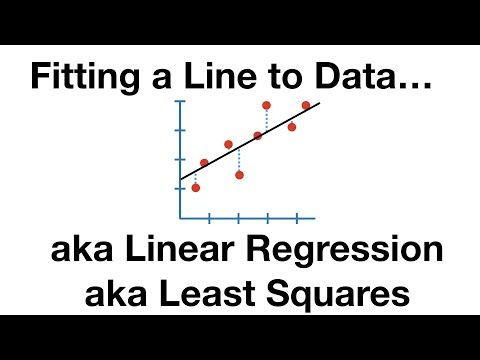

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('PaFPbb66DxQ')

After watching the video above, enroll at [Intro to Machine Learning](https://www.udacity.com/course/intro-to-machine-learning--ud120) (on Udacity) free course. Next, watch a module on linear regression and complete all the quizes, starting from [Lesson 10](https://classroom.udacity.com/courses/ud120/lessons/2301748537/concepts/24828185350923) to the very end of the module. Although you might hear unfamiliar terms e.g. supervised learning, don't think about them just now.

By the end of this section, you should know what linear regression is used for, and how to perform it using Scikit-learn.

### Key takeaways:

* We use linear regression as a tool to model a trendline (like in Excel).
* Regression line explains the numerical relationship between X variable (independent) and Y (dependent).
* Relationship is a weighted sum of X effect on Y. Weight describes how much Y changes when we change X by 1.
* X can be multiple variables, each with its weight.

## Exercise

### Predicting Bicycle Traffic

<div><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Left_side_of_Flying_Pigeon.jpg/2560px-Left_side_of_Flying_Pigeon.jpg" style="height: 350px;"/></div>

We'll follow an example from [Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html#Example:-Predicting-Bicycle-Traffic).

Complete the task yourself and verify afterwards. Don't look at the Jake's solution until you have your own (unless you get stuck), there's no fun in that :).

Objective:

* Predict bike traffic for each day;
* Explain which features affect the number of cyclists most;

Tips:
* Use weather dataset for feature engineering.
* Engineer additional features such as: weeekday, daylight_hrs, is_holiday, temp_celcius, is_dry_day, explain why.

To make things slightly easier, we've downloaded daily bicycle traffic, the daily weather data in Seattle and holiday data, and joined everything.

In case the weather dataset column names seem confusing, check-out [this resource](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00024233/detail), which contains detailed descriptions of each column of the weather dataset.

In [16]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar

counts = pd.read_csv('https://data.seattle.gov/api/views/65db-xm6k/rows.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/BicycleWeather.csv',  index_col='DATE', parse_dates=True)

daily = counts.resample("d").sum()

cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

In [18]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


(8.0, 17.0)

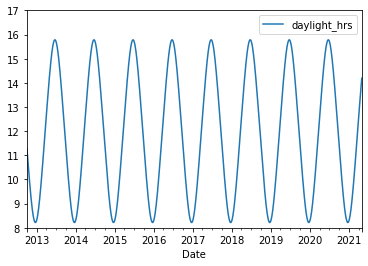

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

In [24]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [25]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [28]:
daily.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,holiday,Mon,Tue,Wed,Thu,Fri,Sat,Sun,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,,,
2012-10-03,7042.0,3520.0,3522.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,6950.0,3416.0,3534.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,6296.0,3116.0,3180.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,4012.0,2160.0,1852.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,4284.0,2382.0,1902.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.045208,0.0,15.85,1.0,0.010959


In [30]:
# Drop any rows with null values
from sklearn.linear_model import LinearRegression
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Fremont Bridge Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

Tip - peek into the data. Engineer enough features for `weather` dataframe you might deem useful to predict bicycle traffic. Afterwards, join the datasets and perform regression.

-----

## Summary

In this subproject, we have studied the most popular data modeling approach - linear regression. Linear models hardly overfit, and they are interpretable, thus often preferred as baselines when modeling the data.